In [1]:
import numpy as np
import matplotlib.pylab as plt
import uproot
import awkward as ak
import seaborn
import RA_funcs as rf
from scipy.signal import find_peaks

imports work


<span style="font-family: arial; font-size:25px; color:pink">

Open ROOT file and extract data

In [3]:

hit_data_1101 = rf.get_ROOT_data_zip("TB_FIRE_1101_hits.root")

hit_data_1096 = rf.get_ROOT_data_zip("TB_FIRE_1096_hits.root")

TB_FIRE_1101_hits.root finished
TB_FIRE_1096_hits.root finished


<span style="font-family: arial; font-size:25px; color:pink">

Hit Counts and Amp in Single Planes

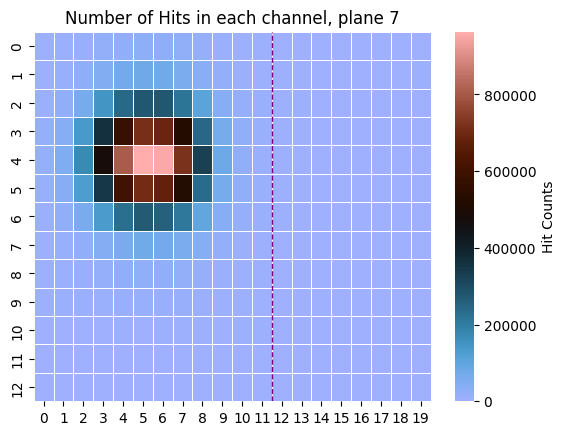

In [3]:
rf.hits_amount_colormap_single_plane(hit_data_1101, 7)

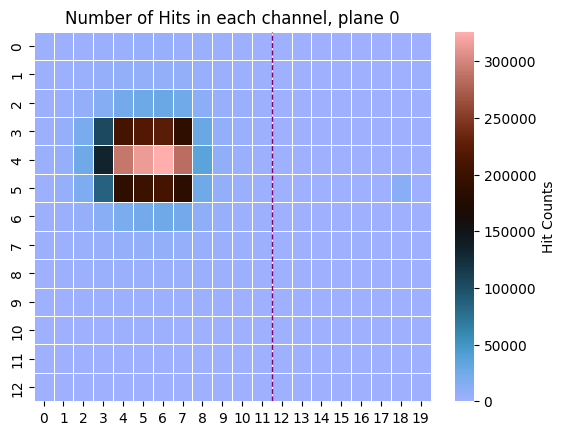

In [4]:
rf.hits_amount_colormap_single_plane(hit_data_1101, 0)

In [4]:
# rf.average_amp_colormap_single_plane(hit_data_1101, 7, cmap="managua")

In [5]:
# rf.average_amp_colormap_single_plane(hit_data_1101, 0, cmap="managua")

<span style="font-family: arial; font-size:25px; color:pink">

Shower Evolution Throughout the Sensor

In [1]:
# rf.single_event_evolution_amp(hit_data_1101, 54106, cmap="managua")

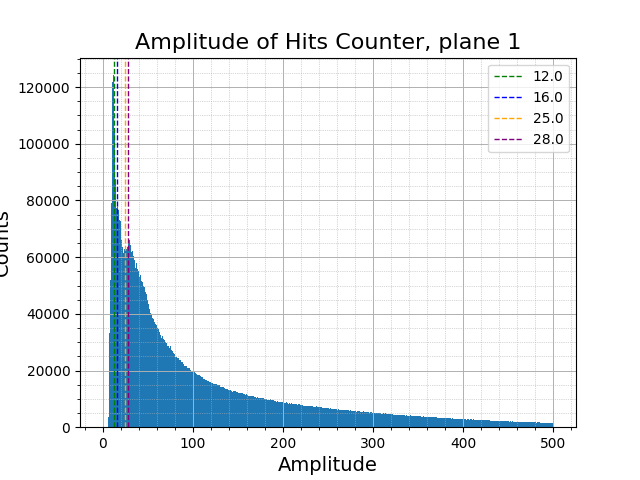

In [12]:
plt.clf()   # Clear the current figure
plt.close() # Close any open figures
%matplotlib widget
rf.amp_histo_single_plane(hit_data_1101,1)

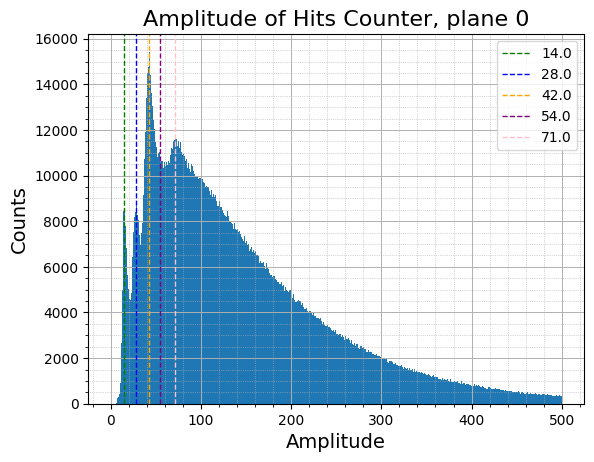

In [16]:
# plt.close('all')
# %matplotlib widget
# histogram of counts for the total amp of an event in a specific plane
def amp_histo_single_plane_total_event(hit_data, plane):

    # change index so that the first plane is 0 and the last is 7
    plane = 7 - plane

    # get the data of the wanted plane
    hit_plane = hit_data[hit_data.plane == plane]

    # create an array of only the amplitudes in the wanted plane
    hit_plane_amp = hit_plane.amp
    hit_plane_amp_clean = hit_plane_amp[ak.num(hit_plane_amp) > 0]
    sum_plane_amp = ak.sum(hit_plane_amp_clean, axis = 1)


    # create and plot an histo to count how many time did we get each amp
    counts, bins, patches = plt.hist(sum_plane_amp, bins=501, range=(0,500))
    max_bin_index = np.argmax(counts)
    peaks, _ = find_peaks(counts, prominence = 200)
    peak_x = (bins[peaks] + bins[peaks + 1]) / 2

    # get the most common amp
    max_bin_center = (bins[max_bin_index] + bins[max_bin_index + 1]) / 2
    max_inputs = np.round(max_bin_center)

    # plot settings
    # plt.axvline(max_inputs, color='red', linestyle='--', label= max_inputs)
    colors = ['green', 'blue', 'orange', 'purple', 'pink']
    for i, px in enumerate(peak_x[:len(colors)]):
        plt.axvline(px, color=colors[i], linestyle='--', linewidth=1, label= np.round(px))
    plt.legend()
    plt.grid(which='major', linestyle='-', linewidth=0.7)
    plt.grid(which='minor', linestyle=':', linewidth=0.5)
    plt.minorticks_on()
    plt.title(f'Amplitude of Hits Counter, plane {7 - plane}', fontsize=16)
    plt.xlabel('Amplitude', fontsize=14)
    plt.ylabel('Counts', fontsize=14)
    plt.show()




amp_histo_single_plane_total_event(hit_data_1101,0)

amount of hits in plane 0: 2154539
amount of hits in plane 1: 2267642
amount of hits in plane 2: 2299936
amount of hits in plane 3: 2305207
amount of hits in plane 4: 287522
amount of hits in plane 5: 2339654
amount of hits in plane 6: 2333522
amount of hits in plane 7: 2347161


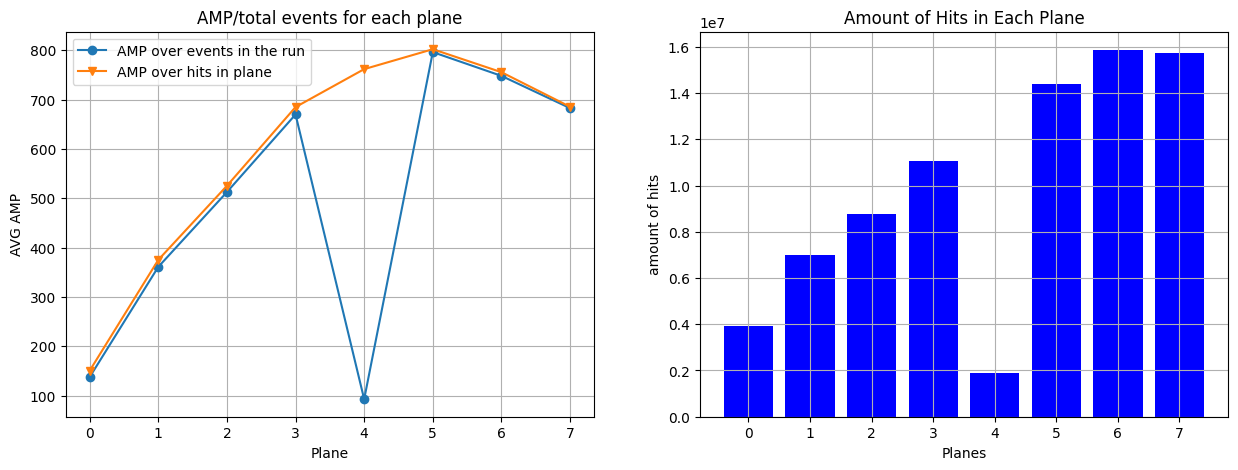

In [11]:
rf.average_amp_vs_plane(hit_data_1101)


total percentage of events: 100.0


c:\Users\bents\Desktop\Personal\work\Halina\F-Cal-TB-project\RA_funcs.py:506: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


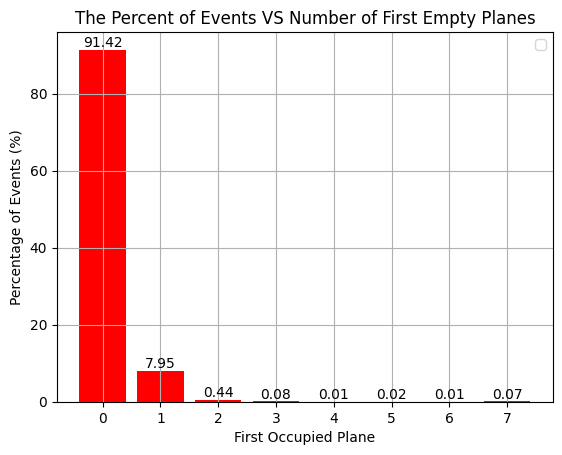

In [12]:
rf.plot_empty_first_planes(hit_data_1101)

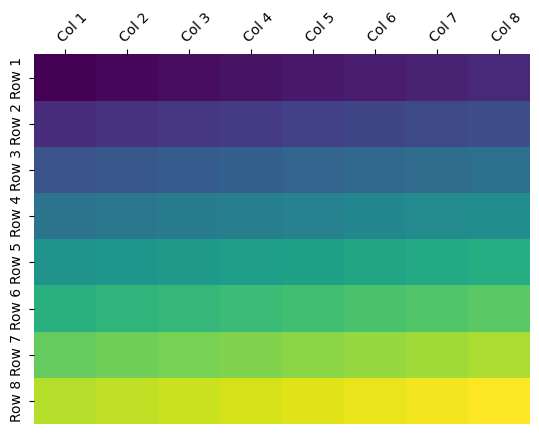

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 8x8 matrix
data = np.arange(64).reshape(8, 8)

row_labels = [f"Row {i+1}" for i in range(8)]
col_labels = [f"Col {j+1}" for j in range(8)]

ax = sns.heatmap(data, xticklabels=col_labels, yticklabels=row_labels, cmap="viridis", cbar=False)

# Move column labels to top
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')  # optional if you also set a title/label

# Rotate for readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")

plt.show()

